In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
from PIL import Image

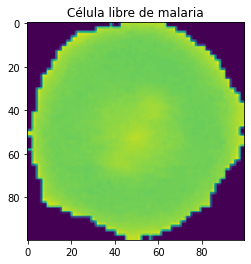

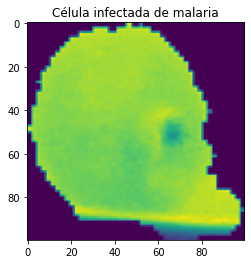

In [2]:
infectadas = glob.glob('Infectadas/*.png')
sanas = glob.glob('Sanas/*.png')

plt.figure()
a = plt.imread(sanas[-10])
plt.imshow(np.mean(a,axis=2))
plt.title('Célula libre de malaria')

plt.figure()
a = plt.imread(infectadas[-10])
plt.imshow(np.mean(a,axis=2))
plt.title('Célula infectada de malaria')


target = []
imagenes = []
i=0

for archivo in infectadas:
    imagen = plt.imread(archivo)
    imagen = np.mean(imagen,axis=2) #Cropea ligeramente las restantes, para dejarlas del mismo tamaño, cambia a monocromático
    imagenes.append(imagen.reshape(10000))
    target.append(1)
    i+=1
        
j=0
for archivo in sanas:
    imagen = plt.imread(archivo)
    imagen = np.mean(imagen,axis=2) #Cropea ligeramente las restantes, para dejarlas del mismo tamaño, cambia a monocromático
    imagenes.append(imagen.reshape(10000))
    target.append(0)
    j+=1

In [3]:
X = np.array(imagenes)
Y = np.array(target)

indices = np.arange(len(Y))
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]
imagenes = X.reshape((len(Y),100,100))


print(np.shape(X),np.shape(Y),i,j)
print

(1141, 10000) (1141,) 571 570


<function print>

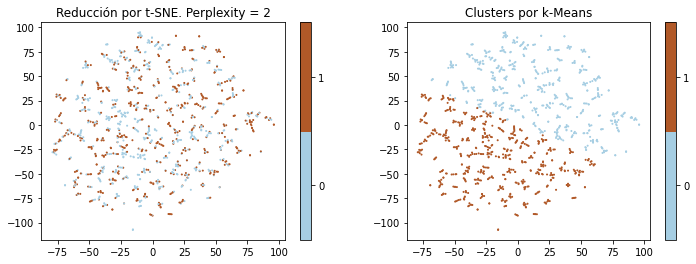

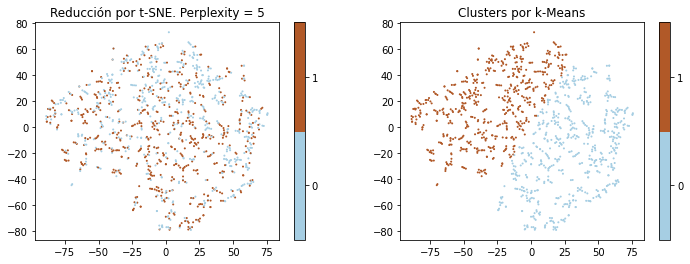

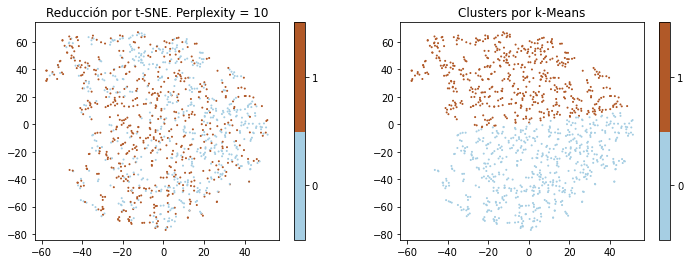

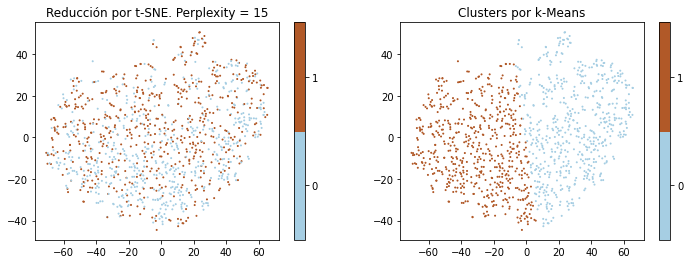

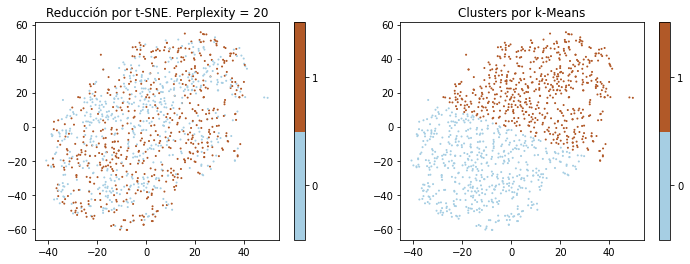

In [4]:
for p in [2,5,10,15,20]:
    tsne = sklearn.manifold.TSNE(perplexity=p)
    tsne.fit(X)

    embedding = tsne.embedding_
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.title('Reducción por t-SNE. Perplexity = ' + str(p))
    
    n_clusters = 2
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    
    plt.subplot(122)
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.title('Clusters por k-Means')

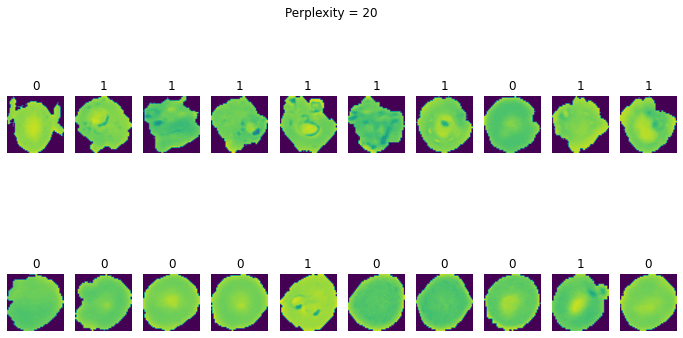

In [5]:
plt.figure(figsize=(12,6))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(imagenes[ind].reshape(100,100))
        #plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.title(str(Y[ind]) )#+ str(ind))
        plt.axis('off')
        plt.suptitle('Perplexity = 20')

## Discusión de resultados

En general, se puede observar que a medida que incrementa el valor de `perplexity`, las proyecciones de las imágenes en el plano tienden a separarse más. Es decir, ese parámetro parece determinar qué tan densamente agrupar los datos.

En este caso particular, el algoritmo de t-SNE no funcionó muy bien para separar estos datos bajo la condición deseada, como se observa en las gráficas correspondientes. Lo más probable es que esté identificando otros patrones que distinguen las imágenes, en particular, puede ser que este clasificándolas según la orientación de las células o su forma. Estos patrones pueden observarse ligeramente en las imágenes que se muestran anteriormente, donde las células de la fila superior parecen orientadas de izquierda-arriba a derecha-abajo, con formás más amorfas, mientras que las de la fila inferior se orientan al contrario y son más redondas. No obstante, estas tendencias son poco claras.